In [3]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [4]:
f_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Train
print("Train set shape: ", train_images.shape)
print("Number of train labels", len(train_labels))
print("Train labels: ", train_labels)

# Test
print("Test set shape: ", test_images.shape)
print("Number of test labels", len(test_labels))
print("Test labels: ", test_labels)

Train set shape:  (60000, 28, 28)
Number of train labels 60000
Train labels:  [9 0 0 ... 3 0 5]
Test set shape:  (10000, 28, 28)
Number of test labels 10000
Test labels:  [9 2 1 ... 8 1 5]


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## data preprocessing

<function matplotlib.pyplot.show>

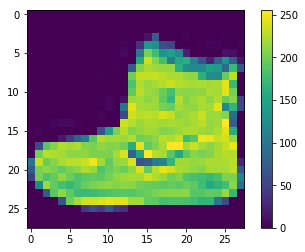

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [0]:
# scaling the data
train_images = train_images/255.0
test_images = test_images/255.0


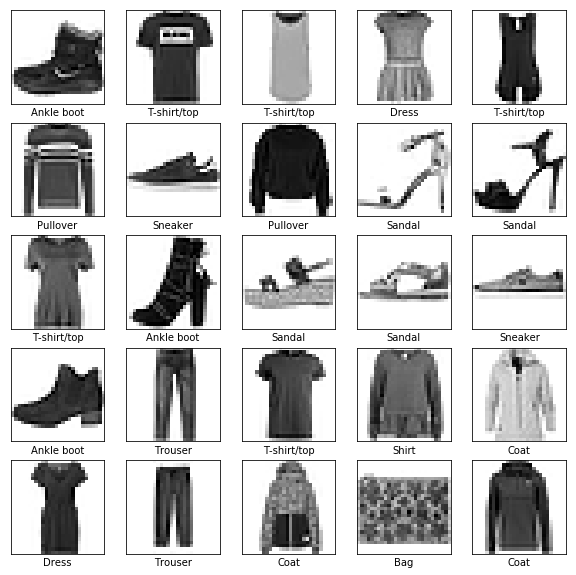

In [18]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

## Building the Model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [15]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.5033 - acc: 0.8233
Epoch 2/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3760 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3366 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3131 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2956 - acc: 0.8915


## Making Predictions

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.3525 - acc: 0.8760
Test accuracy: 0.876


In [0]:
predictions = model.predict(test_images)

In [21]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

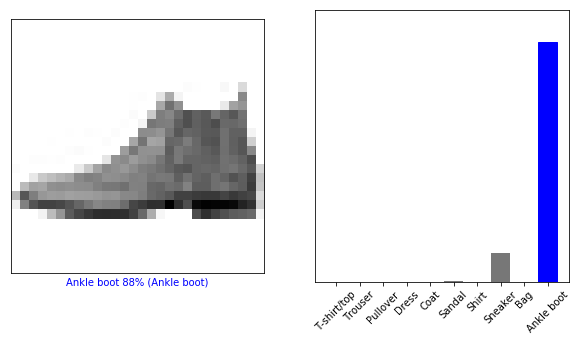

In [25]:
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

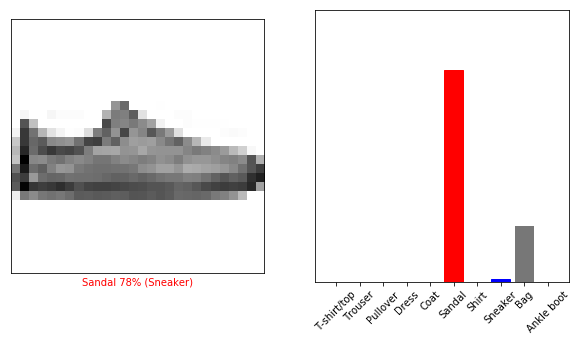

In [26]:
i = 12
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

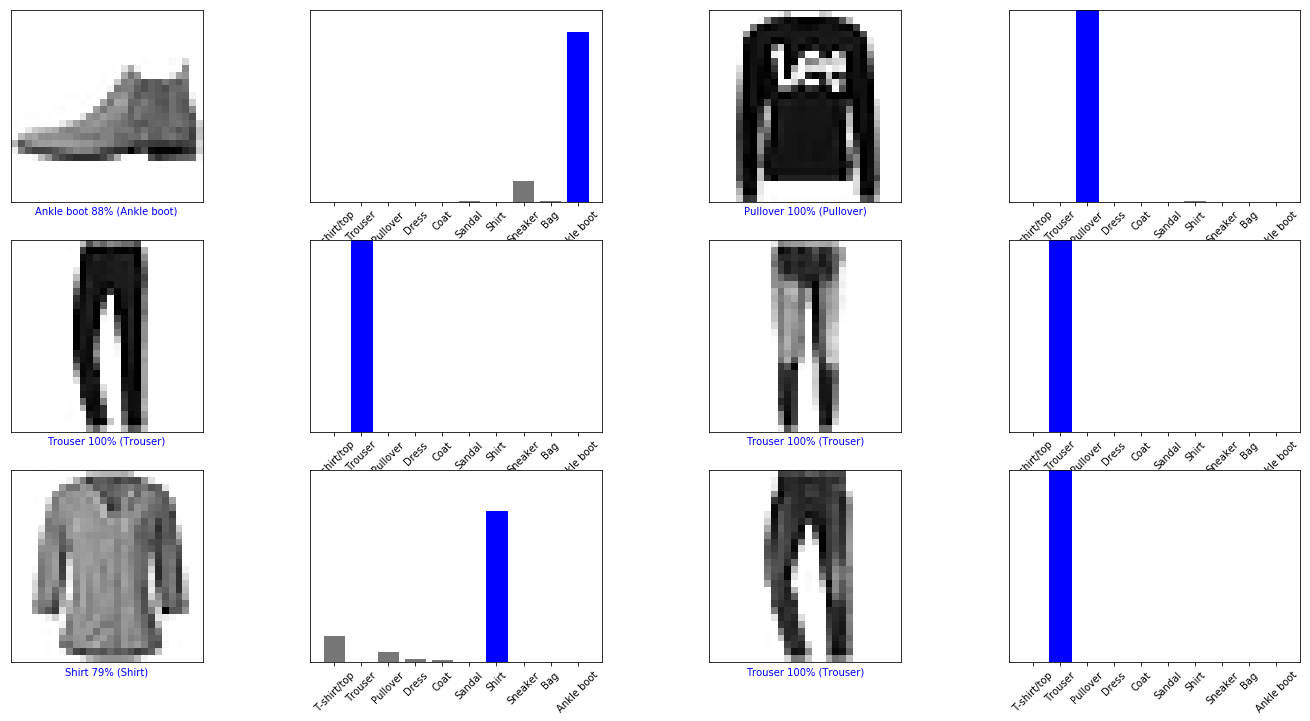

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(6*2*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [39]:
# MLP

# Add layers and change parameters to try and get an accuracy above 90% ! 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#optimizer = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,epochs=8)

Epoch 1/8
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4862 - acc: 0.8242
Epoch 2/8
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3668 - acc: 0.8651
Epoch 3/8
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3300 - acc: 0.8786
Epoch 4/8
60000/60000 [==============================] - 10s 174us/sample - loss: 0.3074 - acc: 0.8854
Epoch 5/8
60000/60000 [==============================] - 10s 173us/sample - loss: 0.2885 - acc: 0.8932
Epoch 6/8
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2747 - acc: 0.8977
Epoch 7/8
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2602 - acc: 0.9019
Epoch 8/8
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2496 - acc: 0.9059
